In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('./salary.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000.0,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000.0,USA,Asian,0


In [3]:
df.shape

(6684, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6684 non-null   float64
 1   Gender               6684 non-null   object 
 2   Education Level      6684 non-null   int64  
 3   Job Title            6684 non-null   object 
 4   Years of Experience  6684 non-null   float64
 5   Salary               6684 non-null   float64
 6   Country              6684 non-null   object 
 7   Race                 6684 non-null   object 
 8   Senior               6684 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 470.1+ KB


In [5]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
Senior                 0
dtype: int64

In [6]:
df.describe()

,Age,Education Level,Years of Experience,Salary,Senior
count,6684.000000,6684.000000,6684.000000,6684.000000,6684.000000
mean,33.610563,1.622382,8.077723,115307.175194,0.143477
std,7.595994,0.880474,6.029305,52806.810881,0.350585
min,21.000000,0.000000,0.000000,350.000000,0.000000
25%,28.000000,1.000000,3.000000,70000.000000,0.000000
50%,32.000000,1.000000,7.000000,115000.000000,0.000000
75%,38.000000,2.000000,12.000000,160000.000000,0.000000
max,62.000000,3.000000,34.000000,250000.000000,1.000000


In [7]:
df.duplicated().sum()

1536

In [8]:
df.drop_duplicates(inplace = True)
df.shape

(5148, 9)

# Data Analysis

Text(0.5, 1.0, 'Distributions')

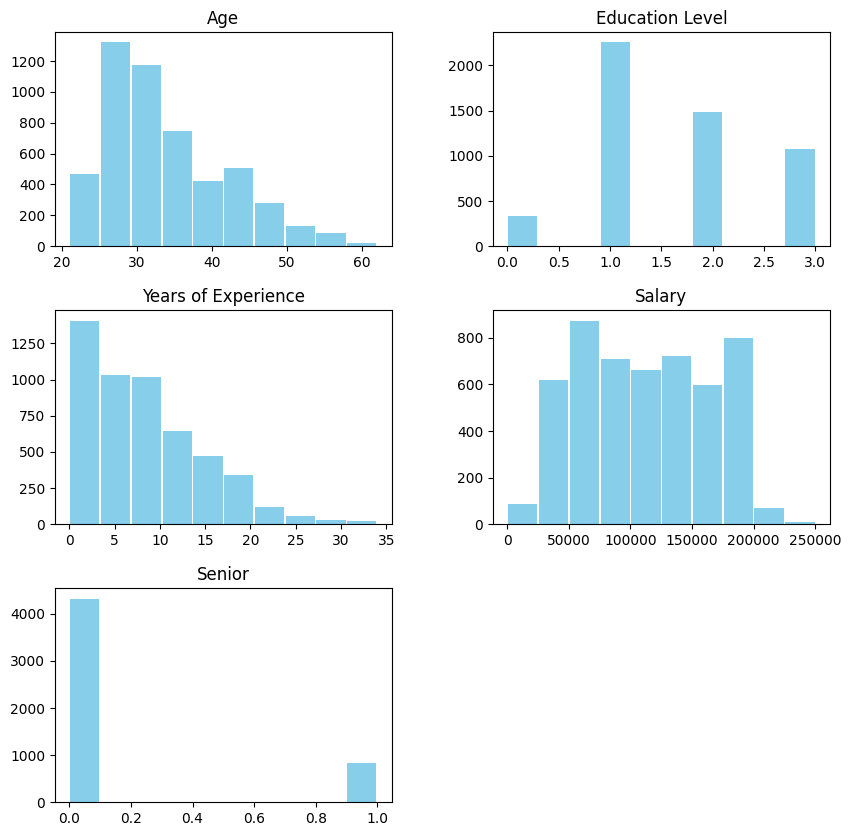

In [9]:
df.hist(figsize = (10, 10), rwidth = 0.95, color = "skyblue", grid = False)
plt.title("Distributions")

Text(0.5, 1.0, 'Years of Experience Distribution (Plot 2)')

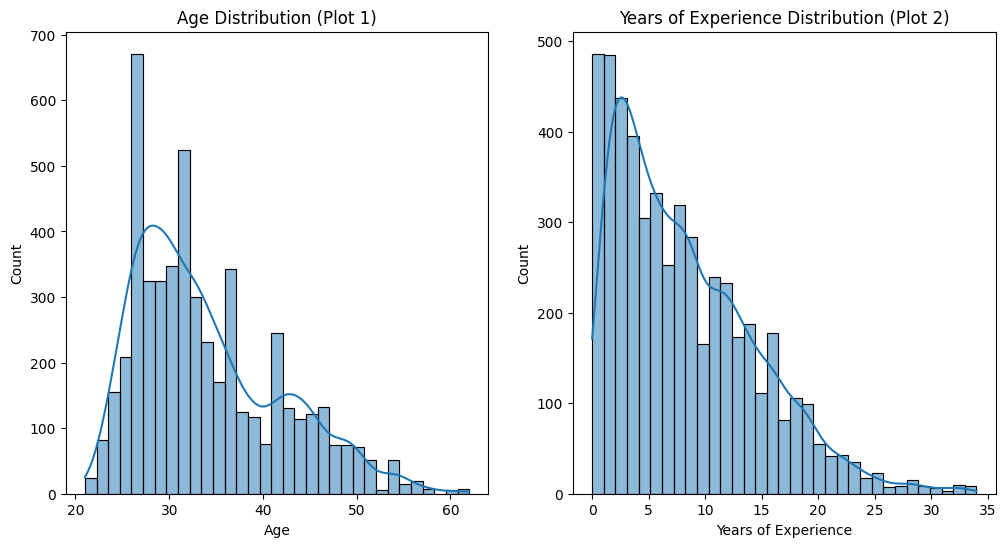

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(df["Age"], kde=True, ax=axs[0])
axs[0].set_title("Age Distribution (Plot 1)")

sns.histplot(df["Years of Experience"], kde=True, ax=axs[1])
axs[1].set_title("Years of Experience Distribution (Plot 2)")

#less old ppl
#less senior ppl

Text(0.5, 1.0, 'Gender Distribution')

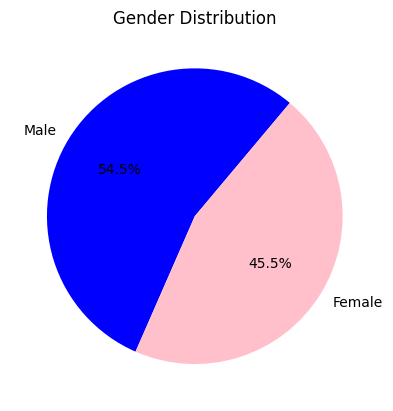

In [11]:
male_count =df["Gender"].value_counts()['Male']
female_count=df["Gender"].value_counts()['Female']
plt.pie([male_count,female_count], labels = ['Male','Female'], colors = ['blue','pink'], startangle = 50, autopct = "%1.1f%%")
plt.title("Gender Distribution")

Text(0, 0.5, 'Salary')

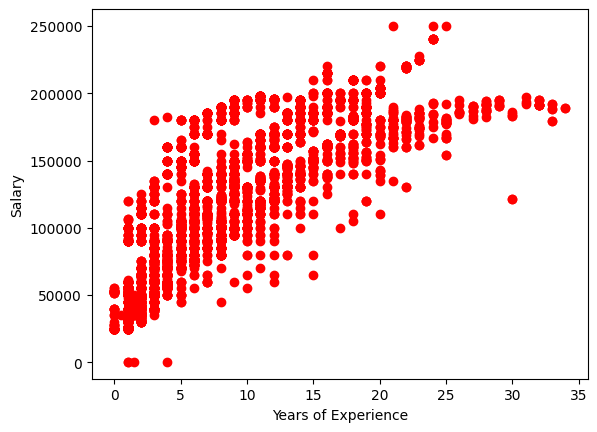

In [12]:
plt.scatter(df["Years of Experience"], df["Salary"], color = "red")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

Text(0, 0.5, 'Salary')

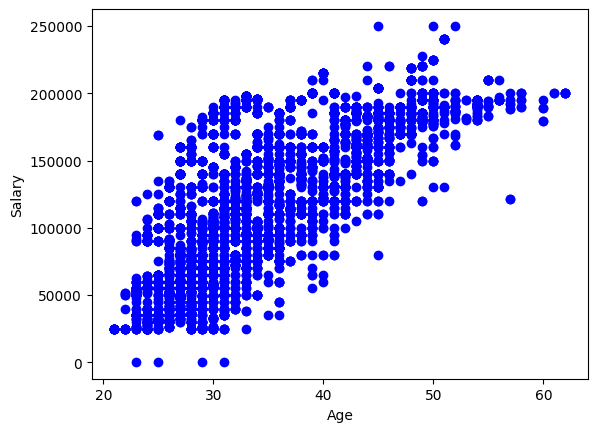

In [13]:
plt.scatter(df["Age"], df["Salary"], color = "b")
plt.xlabel("Age")
plt.ylabel("Salary")

Text(0, 0.5, 'Salary')

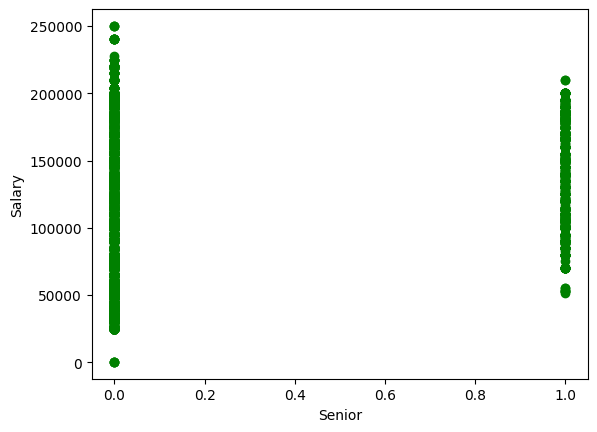

In [14]:
plt.scatter(df["Senior"], df["Salary"], color = "g")
plt.xlabel("Senior")
plt.ylabel("Salary")

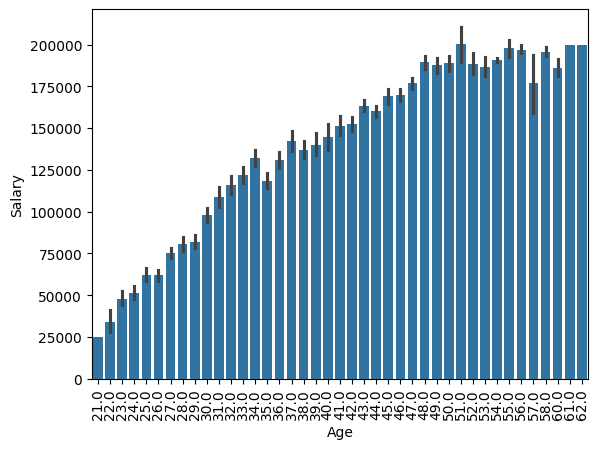

In [15]:
sns.barplot(x=df['Age'],y=df['Salary'])
plt.xticks(rotation='vertical')
plt.show()

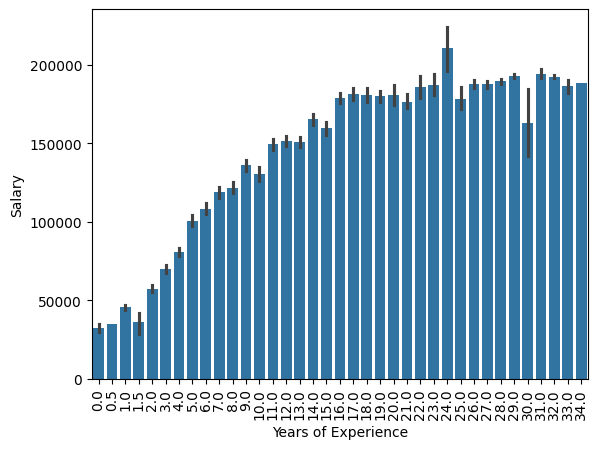

In [16]:
sns.barplot(x=df['Years of Experience'],y=df['Salary'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Education Level', ylabel='Salary'>

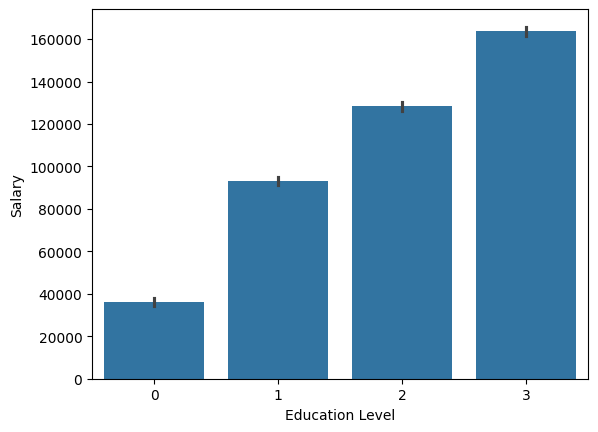

In [17]:
sns.barplot(x=df['Education Level'],y=df['Salary'])

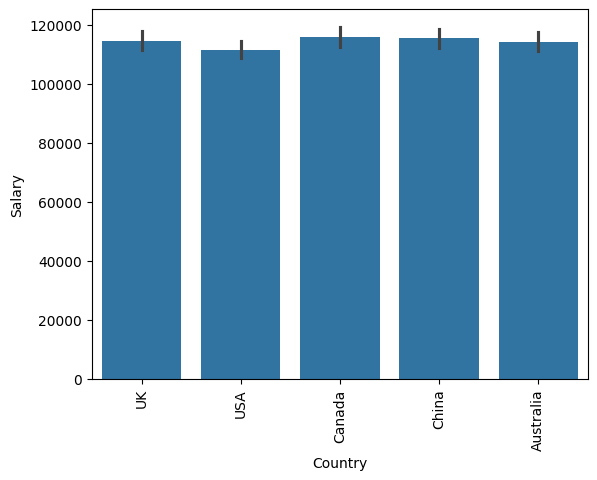

In [18]:
sns.barplot(x=df['Country'],y=df['Salary'])
plt.xticks(rotation='vertical')
plt.show()

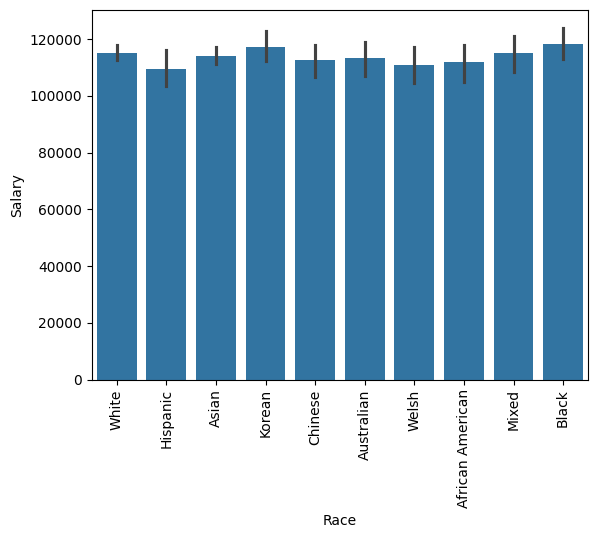

In [19]:
sns.barplot(x=df['Race'],y=df['Salary'])
plt.xticks(rotation='vertical')
plt.show()

# Linear Regression

In [20]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

X = df["Years of Experience"]
y = df["Salary"]

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

train_x = (np.asanyarray(train_x)).reshape(len(train_x), 1)
train_y = (np.asanyarray(train_y)).reshape(len(train_y), 1)

test_x = (np.asanyarray(test_x)).reshape(len(test_x), 1)
test_y = (np.asanyarray(test_y)).reshape(len(test_y), 1)

train_x.shape, test_x.shape, train_y.shape, test_y.shape

((4118, 1), (1030, 1), (4118, 1), (1030, 1))

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_x, train_y)
lr.score(test_x, test_y)

0.6471771414890066

In [22]:
lr.score(train_x, train_y)

0.6700806320146269

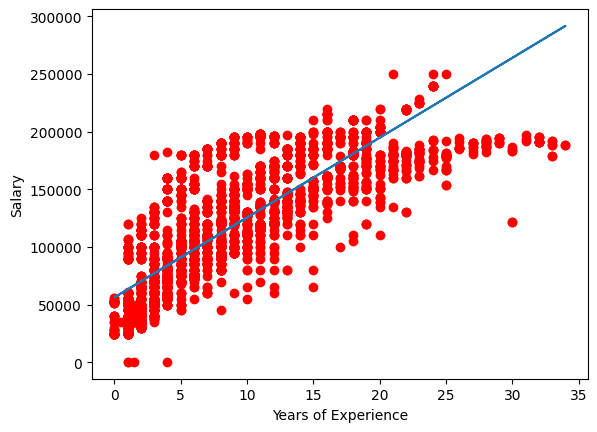

In [23]:
plt.scatter(df["Years of Experience"], df["Salary"], label='Years of Experience', color='r')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.plot(train_x, lr.coef_[0] * train_x + lr.intercept_)

# Multi Regression

In [24]:
X = df[["Years of Experience", "Age"]]
y = df["Salary"]

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)

train_x.shape, test_x.shape, train_y.shape, test_y.shape

((4118, 2), (1030, 2), (4118,), (1030,))

In [25]:
mlr = LinearRegression()
mlr.fit(train_x, train_y)
mlr.score(test_x, test_y)

0.653893454474661

In [26]:
mlr.score(train_x, train_y)

0.6734065635008271

# Logistic Regression

In [27]:
df['Salary more than 100k']=df['Salary'].apply(lambda x: 'true' if x>100000 else 'false')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,Salary more than 100k
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK,White,0,false
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0,false
2,45.0,Male,3,Manager,15.0,150000.0,Canada,White,1,true
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA,Hispanic,0,false
4,52.0,Male,2,Director,20.0,200000.0,USA,Asian,0,true


<Axes: xlabel='Salary more than 100k'>

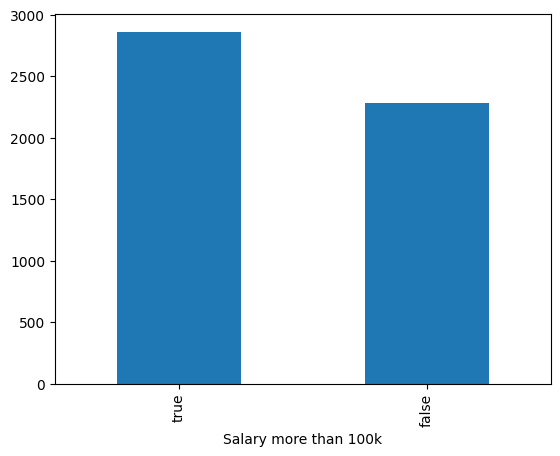

In [28]:
df['Salary more than 100k'].value_counts().plot(kind='bar')

Text(0, 0.5, 'Salary more than 100k')

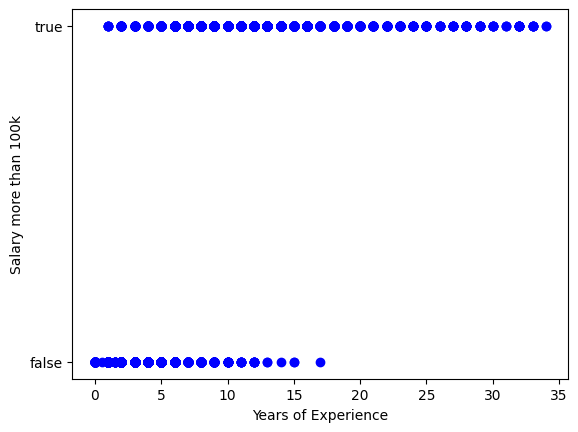

In [29]:
plt.scatter(df['Years of Experience'],df['Salary more than 100k'],color='blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary more than 100k')

In [30]:
x_train,x_test,y_train,y_test=train_test_split(df[['Years of Experience']],df['Salary more than 100k'],train_size=0.8)
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8475728155339806

In [31]:
model.predict(x_test)

array(['false', 'true', 'false', ..., 'true', 'false', 'false'],
      dtype=object)

# Naive Bayes

In [32]:
inputs=df
target=inputs['Salary more than 100k']
inputs=inputs.drop(['Job Title', 'Country','Race','Salary','Salary more than 100k'], axis='columns')

In [33]:
dummies=pd.get_dummies(inputs.Gender)
dummies.head()

,Female,Male
0,False,True
1,True,False
2,False,True
3,True,False
4,False,True


In [34]:
inputs=pd.concat([inputs,dummies],axis='columns')
inputs.head()

,Age,Gender,Education Level,Years of Experience,Senior,Female,Male
0,32.0,Male,1,5.0,0,False,True
1,28.0,Female,2,3.0,0,True,False
2,45.0,Male,3,15.0,1,False,True
3,36.0,Female,1,7.0,0,True,False
4,52.0,Male,2,20.0,0,False,True


In [35]:
inputs.drop(['Gender'],axis='columns',inplace=True)
inputs.head()

,Age,Education Level,Years of Experience,Senior,Female,Male
0,32.0,1,5.0,0,False,True
1,28.0,2,3.0,0,True,False
2,45.0,3,15.0,1,False,True
3,36.0,1,7.0,0,True,False
4,52.0,2,20.0,0,False,True


In [36]:
#based on age gender yoe seniority and edu lvl get prob of salary > 100k
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.3)

In [37]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [38]:
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8265372168284789

In [39]:
y_test[0:10]

263     false
1812     true
616      true
6249     true
1509     true
2251     true
528      true
4519    false
6572     true
2135     true
Name: Salary more than 100k, dtype: object

In [40]:
model.predict(X_test[0:10])

array(['false', 'true', 'false', 'true', 'true', 'true', 'false', 'false',
       'true', 'true'], dtype='<U5')

# SVM

In [41]:
df['Senior'].value_counts()

Senior
0    4323
1     825
Name: count, dtype: int64

In [42]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,Salary more than 100k
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK,White,0,false
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0,false
2,45.0,Male,3,Manager,15.0,150000.0,Canada,White,1,true
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA,Hispanic,0,false
4,52.0,Male,2,Director,20.0,200000.0,USA,Asian,0,true


In [43]:
df0=df[df['Senior']==0]
df1=df[df['Senior']==1]

Text(0, 0.5, 'Salary')

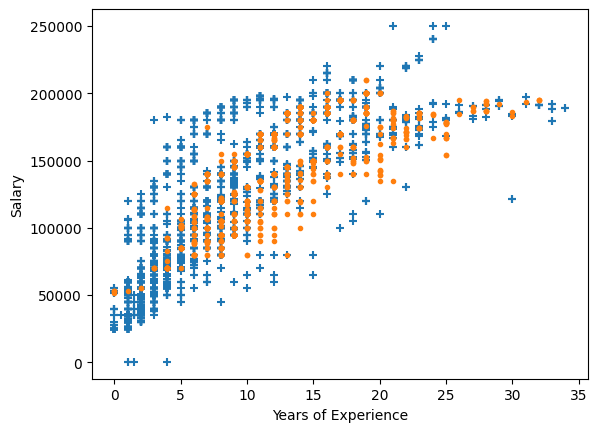

In [44]:
plt.scatter(df0['Years of Experience'],df0['Salary'],marker='+')
plt.scatter(df1['Years of Experience'],df1['Salary'],marker='.')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

In [45]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,Salary more than 100k
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK,White,0,false
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0,false
2,45.0,Male,3,Manager,15.0,150000.0,Canada,White,1,true
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA,Hispanic,0,false
4,52.0,Male,2,Director,20.0,200000.0,USA,Asian,0,true


In [46]:
X=df.drop(['Senior','Job Title', 'Country','Race','Salary more than 100k','Gender','Age','Education Level'],axis='columns')
Y=df['Senior']

In [47]:
X.head()

,Years of Experience,Salary
0,5.0,90000.0
1,3.0,65000.0
2,15.0,150000.0
3,7.0,60000.0
4,20.0,200000.0


In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)

In [49]:
from sklearn.svm import SVC
model=SVC()

In [50]:
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.83042071197411

# Decision Tree

In [51]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,Salary more than 100k
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK,White,0,false
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0,false
2,45.0,Male,3,Manager,15.0,150000.0,Canada,White,1,true
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA,Hispanic,0,false
4,52.0,Male,2,Director,20.0,200000.0,USA,Asian,0,true


In [52]:
inputs = df.drop(['Senior','Job Title', 'Country','Race','Salary more than 100k','Gender','Salary'],axis='columns')
target = df['Salary more than 100k']

In [53]:
inputs.head()

,Age,Education Level,Years of Experience
0,32.0,1,5.0
1,28.0,2,3.0
2,45.0,3,15.0
3,36.0,1,7.0
4,52.0,2,20.0


In [54]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(inputs, target)

DecisionTreeClassifier()

In [55]:
model.score(inputs,target)

0.9240481740481741

[Text(0.4109747023809524, 0.9615384615384616, 'x[2] <= 5.5\ngini = 0.494\nsamples = 5148\nvalue = [2284, 2864]'),
 Text(0.16726190476190475, 0.8846153846153846, 'x[2] <= 4.5\ngini = 0.219\nsamples = 2108\nvalue = [1844, 264]'),
 Text(0.0869047619047619, 0.8076923076923077, 'x[2] <= 1.75\ngini = 0.156\nsamples = 1803\nvalue = [1649, 154]'),
 Text(0.0380952380952381, 0.7307692307692307, 'x[1] <= 2.5\ngini = 0.02\nsamples = 497\nvalue = [492, 5]'),
 Text(0.03333333333333333, 0.6538461538461539, 'gini = 0.0\nsamples = 482\nvalue = [482, 0]'),
 Text(0.04285714285714286, 0.6538461538461539, 'x[2] <= 0.5\ngini = 0.444\nsamples = 15\nvalue = [10, 5]'),
 Text(0.0380952380952381, 0.5769230769230769, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.047619047619047616, 0.5769230769230769, 'x[0] <= 23.5\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.04285714285714286, 0.5, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.05238095238095238, 0.5, 'gini = 0.375\nsamples = 4\nvalue = [1,

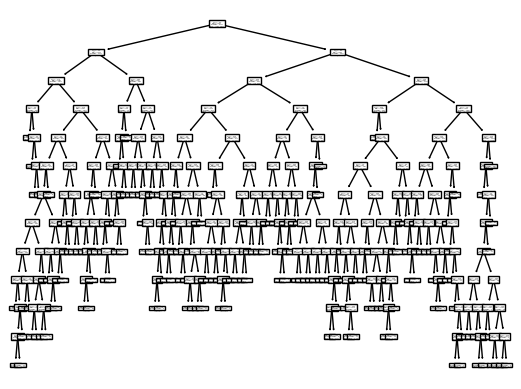

In [56]:
from sklearn import tree
tree.plot_tree(model)

# KNN

In [57]:
df0=df[df['Senior']==0]
df1=df[df['Senior']==1]

Text(0, 0.5, 'Salary')

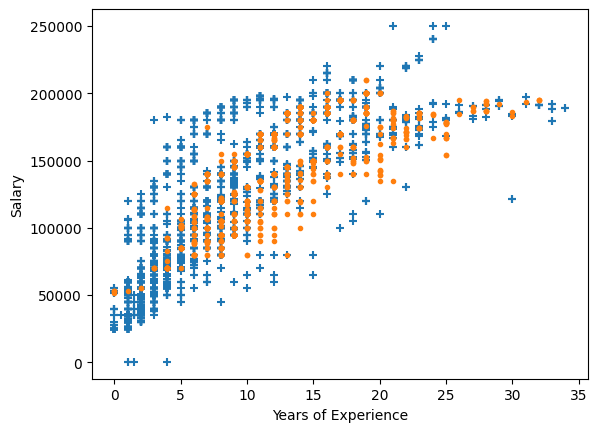

In [58]:
plt.scatter(df0['Years of Experience'],df0['Salary'],marker='+')
plt.scatter(df1['Years of Experience'],df1['Salary'],marker='.')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

In [59]:
X=df.drop(['Senior','Job Title', 'Country','Race','Salary more than 100k','Gender','Age','Education Level'],axis='columns')
Y=df['Senior']

In [60]:
X.head()

,Years of Experience,Salary
0,5.0,90000.0
1,3.0,65000.0
2,15.0,150000.0
3,7.0,60000.0
4,20.0,200000.0


In [61]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=100)

In [63]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [64]:
knn.score(x_test,y_test)

0.8485436893203884

In [65]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(x_test)
cm=confusion_matrix(y_test, y_pred)
cm

array([[1311,    0],
       [ 234,    0]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

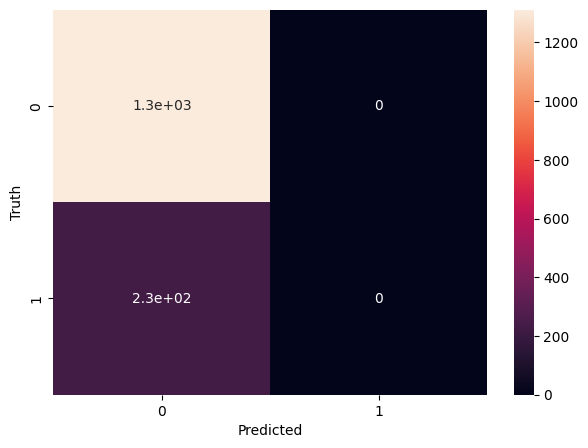

In [66]:
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# K Means

In [67]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,Salary more than 100k
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK,White,0,false
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0,false
2,45.0,Male,3,Manager,15.0,150000.0,Canada,White,1,true
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA,Hispanic,0,false
4,52.0,Male,2,Director,20.0,200000.0,USA,Asian,0,true


Text(0, 0.5, 'Salary')

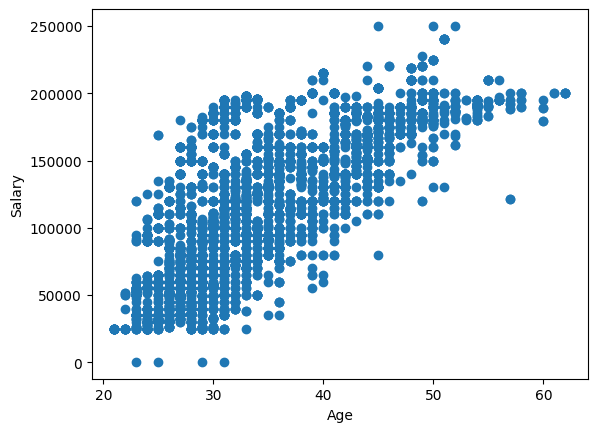

In [68]:
plt.scatter(df.Age,df['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')

In [69]:
from sklearn.cluster import KMeans
df0=df
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(df0[['Age','Salary']])
y_predicted

C:\Users\ananya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([4, 4, 3, ..., 0, 0, 3])

In [70]:
df0['cluster']=y_predicted
df0=df0.drop(['Gender','Education Level','Job Title','Years of Experience','Country','Race','Senior','Salary more than 100k'],axis='columns')
df0.head()

,Age,Salary,cluster
0,32.0,90000.0,4
1,28.0,65000.0,4
2,45.0,150000.0,3
3,36.0,60000.0,4
4,52.0,200000.0,1


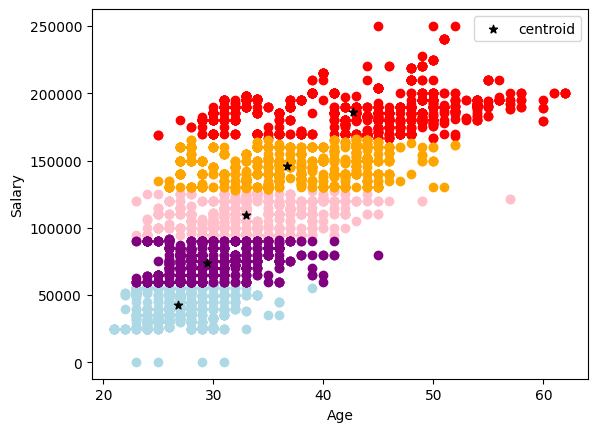

In [71]:
df1 = df0[df0.cluster==0]
df2 = df0[df0.cluster==1]
df3 = df0[df0.cluster==2]
df4 = df0[df0.cluster==3]
df5 = df0[df0.cluster==4]
plt.scatter(df1.Age,df1['Salary'],color='lightblue')
plt.scatter(df2.Age,df2['Salary'],color='red')
plt.scatter(df3.Age,df3['Salary'],color='pink')
plt.scatter(df4.Age,df4['Salary'],color='orange')
plt.scatter(df5.Age,df5['Salary'],color='purple')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend() 

In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df0[['Salary']])
df0['Salary'] = scaler.transform(df0[['Salary']])

scaler.fit(df0[['Age']])
df0['Age'] = scaler.transform(df0[['Age']])

df0.head()

,Age,Salary,cluster
0,0.268293,0.359103,4
1,0.170732,0.258963,4
2,0.585366,0.599439,3
3,0.365854,0.238935,4
4,0.756098,0.799720,1


In [73]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df0[['Age','Salary']])
y_predicted

C:\Users\ananya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 0, ..., 1, 1, 0])

In [74]:
df0['cluster']=y_predicted
df0.head()

,Age,Salary,cluster
0,0.268293,0.359103,1
1,0.170732,0.258963,1
2,0.585366,0.599439,0
3,0.365854,0.238935,1
4,0.756098,0.799720,0


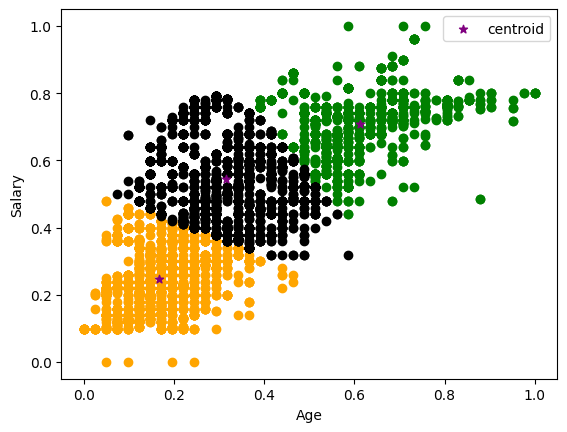

In [75]:
df1 = df0[df0.cluster==0]
df2 = df0[df0.cluster==1]
df3 = df0[df0.cluster==2]

plt.scatter(df1.Age,df1['Salary'],color='green')
plt.scatter(df2.Age,df2['Salary'],color='orange')
plt.scatter(df3.Age,df3['Salary'],color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend() 

C:\Users\ananya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ananya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ananya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ananya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\

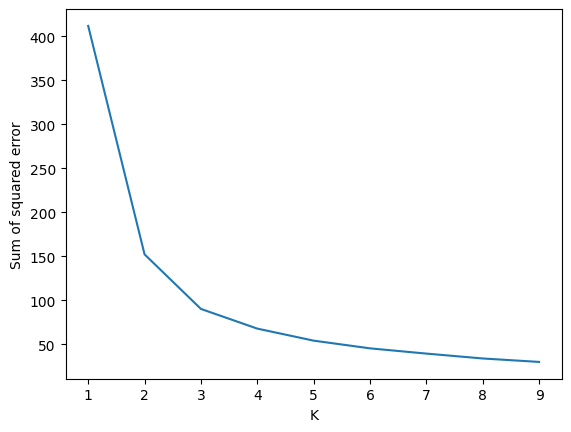

In [76]:
sse = []
k_rng = range(1,10)
for k in k_rng:
 km = KMeans(n_clusters=k)
 km.fit(df0[['Age','Salary']])
 sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

# Random Forest

In [77]:
inputs = df.drop(['Senior','Job Title', 'Country','Race','Salary more than 100k','Gender','Salary','cluster'],axis='columns')
target = df['Salary more than 100k']

In [78]:
inputs.head()

,Age,Education Level,Years of Experience
0,32.0,1,5.0
1,28.0,2,3.0
2,45.0,3,15.0
3,36.0,1,7.0
4,52.0,2,20.0


In [79]:
x_train, x_test, y_train, y_test = train_test_split(inputs,target, test_size=0.2)

In [80]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=2)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9077669902912622

In [81]:
y_predicted=model.predict(x_test)

In [82]:
cm=confusion_matrix(y_test,y_predicted)
cm

array([[426,  47],
       [ 48, 509]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

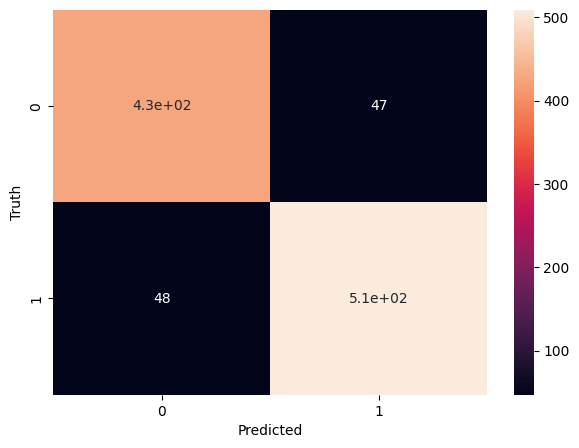

In [83]:
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')